In [2]:
import pandas as pd

metadata = pd.read_csv("../dataset/metadata.csv")

metadata


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/vishnurchityala/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loo

AttributeError: _ARRAY_API not found

,image_path,mask_path,label
0,benign/benign (1).png,benign/benign (1)_mask.png,Benign
1,benign/benign (10).png,benign/benign (10)_mask.png,Benign
2,benign/benign (100).png,benign/benign (100)_mask.png,Benign
3,benign/benign (101).png,benign/benign (101)_mask.png,Benign
4,benign/benign (102).png,benign/benign (102)_mask.png,Benign
...,...,...,...
775,normal/normal (95).png,normal/normal (95)_mask.png,Normal
776,normal/normal (96).png,normal/normal (96)_mask.png,Normal
777,normal/normal (97).png,normal/normal (97)_mask.png,Normal
778,normal/normal (98).png,normal/normal (98)_mask.png,Normal


In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
IMG_SIZE = (224, 224)

In [5]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [6]:
def preprocess_image(img_path):
    """Loads an image, applies CLAHE, resizes it, normalizes it, and converts it to 3-channel RGB."""
    if not os.path.exists(img_path):
        print(f"Warning: Image not found - {img_path}")
        return None
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = clahe.apply(img)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = np.stack([img] * 3, axis=-1)
    
    return img

In [7]:
def preprocess_mask(mask_path):
    """Loads a mask image, resizes it, and ensures binary format (0 or 1)."""
    if not os.path.exists(mask_path):
        print(f"Warning: Mask not found - {mask_path}")
        return None
    
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, IMG_SIZE)
    mask = mask / 255.0
    mask = np.where(mask > 0.5, 1, 0).astype(np.uint8)
    
    return mask

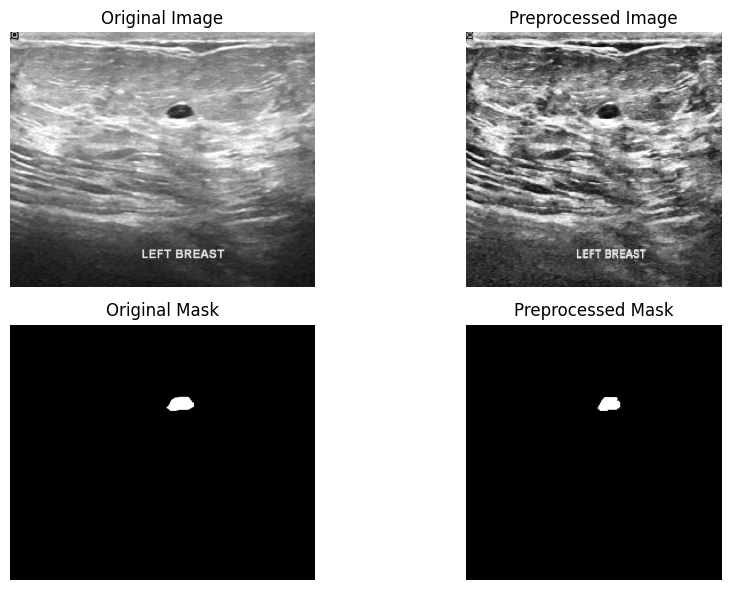

In [8]:
num_samples = 1

for i in range(num_samples):
    img_rel_path = metadata.iloc[i]['image_path']
    mask_rel_path = metadata.iloc[i]['mask_path']
    
    base_img = os.path.splitext(os.path.basename(img_rel_path))[0]
    base_mask = os.path.splitext(os.path.basename(mask_rel_path))[0]
    expected_mask = base_img + "_mask"

    
    full_img_path = os.path.join("../dataset", img_rel_path)
    full_mask_path = os.path.join("../dataset", mask_rel_path)
    
    original_img = cv2.imread(full_img_path, cv2.IMREAD_GRAYSCALE)
    original_mask = cv2.imread(full_mask_path, cv2.IMREAD_GRAYSCALE)
    
    preprocessed_img = preprocess_image(full_img_path)
    preprocessed_mask = preprocess_mask(full_mask_path)
    
    if original_img is not None and preprocessed_img is not None and original_mask is not None and preprocessed_mask is not None:
        plt.figure(figsize=(10, 6))
        
        plt.subplot(2, 2, 1)
        plt.imshow(original_img, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(2, 2, 2)
        plt.imshow(preprocessed_img, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')
        
        plt.subplot(2, 2, 3)
        plt.imshow(original_mask, cmap='gray')
        plt.title("Original Mask")
        plt.axis('off')
        
        plt.subplot(2, 2, 4)
        plt.imshow(preprocessed_mask, cmap='gray')
        plt.title("Preprocessed Mask")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

In [9]:
processed_images_dir = "../processed-dataset/"
processed_masks_dir = "../processed-dataset/"
dataset_dir = "../dataset"

categories = ["benign", "normal", "malignant"]
for category in categories:
    os.makedirs(os.path.join(processed_images_dir, category), exist_ok=True)
    os.makedirs(os.path.join(processed_masks_dir, category), exist_ok=True)

In [10]:
for idx, row in metadata.iterrows():
    rel_img_path = row['image_path']
    rel_mask_path = row['mask_path']
    category = rel_img_path.split(os.sep)[0]
    
    full_img_path = os.path.join(dataset_dir, rel_img_path)
    base_name, ext = os.path.splitext(os.path.basename(rel_img_path))
    expected_mask_filename = base_name + "_mask" + ext
    full_mask_path = os.path.join(dataset_dir, category, expected_mask_filename)
    
    processed_img = preprocess_image(full_img_path)
    processed_mask = preprocess_mask(full_mask_path)
    
    if processed_img is not None and processed_mask is not None:
        out_img_path = os.path.join(processed_images_dir, category, os.path.basename(rel_img_path))
        out_mask_path = os.path.join(processed_masks_dir, category, expected_mask_filename)
        
        img_to_save = (processed_img * 255).astype(np.uint8)
        mask_to_save = (processed_mask * 255).astype(np.uint8)
        img_to_save_bgr = cv2.cvtColor(img_to_save, cv2.COLOR_RGB2BGR)
        
        cv2.imwrite(out_img_path, img_to_save_bgr)
        cv2.imwrite(out_mask_path, mask_to_save)
        print(f"Processed and saved: {rel_img_path} and {expected_mask_filename}")

print("All processed images and masks have been saved!")

Processed and saved: benign/benign (1).png and benign (1)_mask.png
Processed and saved: benign/benign (10).png and benign (10)_mask.png
Processed and saved: benign/benign (100).png and benign (100)_mask.png
Processed and saved: benign/benign (101).png and benign (101)_mask.png
Processed and saved: benign/benign (102).png and benign (102)_mask.png
Processed and saved: benign/benign (103).png and benign (103)_mask.png
Processed and saved: benign/benign (104).png and benign (104)_mask.png
Processed and saved: benign/benign (105).png and benign (105)_mask.png
Processed and saved: benign/benign (106).png and benign (106)_mask.png
Processed and saved: benign/benign (107).png and benign (107)_mask.png
Processed and saved: benign/benign (108).png and benign (108)_mask.png
Processed and saved: benign/benign (109).png and benign (109)_mask.png
Processed and saved: benign/benign (11).png and benign (11)_mask.png
Processed and saved: benign/benign (110).png and benign (110)_mask.png
Processed and 

Processed and saved: benign/benign (220).png and benign (220)_mask.png
Processed and saved: benign/benign (221).png and benign (221)_mask.png
Processed and saved: benign/benign (222).png and benign (222)_mask.png
Processed and saved: benign/benign (223).png and benign (223)_mask.png
Processed and saved: benign/benign (224).png and benign (224)_mask.png
Processed and saved: benign/benign (225).png and benign (225)_mask.png
Processed and saved: benign/benign (226).png and benign (226)_mask.png
Processed and saved: benign/benign (227).png and benign (227)_mask.png
Processed and saved: benign/benign (228).png and benign (228)_mask.png
Processed and saved: benign/benign (229).png and benign (229)_mask.png
Processed and saved: benign/benign (23).png and benign (23)_mask.png
Processed and saved: benign/benign (230).png and benign (230)_mask.png
Processed and saved: benign/benign (231).png and benign (231)_mask.png
Processed and saved: benign/benign (232).png and benign (232)_mask.png
Processe

Processed and saved: benign/benign (328).png and benign (328)_mask.png
Processed and saved: benign/benign (329).png and benign (329)_mask.png
Processed and saved: benign/benign (33).png and benign (33)_mask.png
Processed and saved: benign/benign (330).png and benign (330)_mask.png
Processed and saved: benign/benign (331).png and benign (331)_mask.png
Processed and saved: benign/benign (332).png and benign (332)_mask.png
Processed and saved: benign/benign (333).png and benign (333)_mask.png
Processed and saved: benign/benign (334).png and benign (334)_mask.png
Processed and saved: benign/benign (335).png and benign (335)_mask.png
Processed and saved: benign/benign (336).png and benign (336)_mask.png
Processed and saved: benign/benign (337).png and benign (337)_mask.png
Processed and saved: benign/benign (338).png and benign (338)_mask.png
Processed and saved: benign/benign (339).png and benign (339)_mask.png
Processed and saved: benign/benign (34).png and benign (34)_mask.png
Processed 

Processed and saved: benign/benign (434).png and benign (434)_mask.png
Processed and saved: benign/benign (435).png and benign (435)_mask.png
Processed and saved: benign/benign (436).png and benign (436)_mask.png
Processed and saved: benign/benign (437).png and benign (437)_mask.png
Processed and saved: benign/benign (44).png and benign (44)_mask.png
Processed and saved: benign/benign (45).png and benign (45)_mask.png
Processed and saved: benign/benign (46).png and benign (46)_mask.png
Processed and saved: benign/benign (47).png and benign (47)_mask.png
Processed and saved: benign/benign (48).png and benign (48)_mask.png
Processed and saved: benign/benign (49).png and benign (49)_mask.png
Processed and saved: benign/benign (5).png and benign (5)_mask.png
Processed and saved: benign/benign (50).png and benign (50)_mask.png
Processed and saved: benign/benign (51).png and benign (51)_mask.png
Processed and saved: benign/benign (52).png and benign (52)_mask.png
Processed and saved: benign/

Processed and saved: malignant/malignant (164).png and malignant (164)_mask.png
Processed and saved: malignant/malignant (165).png and malignant (165)_mask.png
Processed and saved: malignant/malignant (166).png and malignant (166)_mask.png
Processed and saved: malignant/malignant (167).png and malignant (167)_mask.png
Processed and saved: malignant/malignant (168).png and malignant (168)_mask.png
Processed and saved: malignant/malignant (169).png and malignant (169)_mask.png
Processed and saved: malignant/malignant (17).png and malignant (17)_mask.png
Processed and saved: malignant/malignant (170).png and malignant (170)_mask.png
Processed and saved: malignant/malignant (171).png and malignant (171)_mask.png
Processed and saved: malignant/malignant (172).png and malignant (172)_mask.png
Processed and saved: malignant/malignant (173).png and malignant (173)_mask.png
Processed and saved: malignant/malignant (174).png and malignant (174)_mask.png
Processed and saved: malignant/malignant (

Processed and saved: malignant/malignant (82).png and malignant (82)_mask.png
Processed and saved: malignant/malignant (83).png and malignant (83)_mask.png
Processed and saved: malignant/malignant (84).png and malignant (84)_mask.png
Processed and saved: malignant/malignant (85).png and malignant (85)_mask.png
Processed and saved: malignant/malignant (86).png and malignant (86)_mask.png
Processed and saved: malignant/malignant (87).png and malignant (87)_mask.png
Processed and saved: malignant/malignant (88).png and malignant (88)_mask.png
Processed and saved: malignant/malignant (89).png and malignant (89)_mask.png
Processed and saved: malignant/malignant (9).png and malignant (9)_mask.png
Processed and saved: malignant/malignant (90).png and malignant (90)_mask.png
Processed and saved: malignant/malignant (91).png and malignant (91)_mask.png
Processed and saved: malignant/malignant (92).png and malignant (92)_mask.png
Processed and saved: malignant/malignant (93).png and malignant (9

Processed and saved: normal/normal (88).png and normal (88)_mask.png
Processed and saved: normal/normal (89).png and normal (89)_mask.png
Processed and saved: normal/normal (9).png and normal (9)_mask.png
Processed and saved: normal/normal (90).png and normal (90)_mask.png
Processed and saved: normal/normal (91).png and normal (91)_mask.png
Processed and saved: normal/normal (92).png and normal (92)_mask.png
Processed and saved: normal/normal (93).png and normal (93)_mask.png
Processed and saved: normal/normal (94).png and normal (94)_mask.png
Processed and saved: normal/normal (95).png and normal (95)_mask.png
Processed and saved: normal/normal (96).png and normal (96)_mask.png
Processed and saved: normal/normal (97).png and normal (97)_mask.png
Processed and saved: normal/normal (98).png and normal (98)_mask.png
Processed and saved: normal/normal (99).png and normal (99)_mask.png
All processed images and masks have been saved!


In [11]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(metadata, test_size=0.3, stratify=metadata['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

metadata.loc[train_df.index, 'split'] = 'train'
metadata.loc[val_df.index, 'split'] = 'val'
metadata.loc[test_df.index, 'split'] = 'test'

metadata.to_csv("../processed-dataset/metadata_split.csv", index=False)
print("Dataset split completed and saved to metadata_split.csv!")

Dataset split completed and saved to metadata_split.csv!


In [12]:
metadata

,image_path,mask_path,label,split
0,benign/benign (1).png,benign/benign (1)_mask.png,Benign,train
1,benign/benign (10).png,benign/benign (10)_mask.png,Benign,val
2,benign/benign (100).png,benign/benign (100)_mask.png,Benign,train
3,benign/benign (101).png,benign/benign (101)_mask.png,Benign,train
4,benign/benign (102).png,benign/benign (102)_mask.png,Benign,val
...,...,...,...,...
775,normal/normal (95).png,normal/normal (95)_mask.png,Normal,train
776,normal/normal (96).png,normal/normal (96)_mask.png,Normal,train
777,normal/normal (97).png,normal/normal (97)_mask.png,Normal,train
778,normal/normal (98).png,normal/normal (98)_mask.png,Normal,train


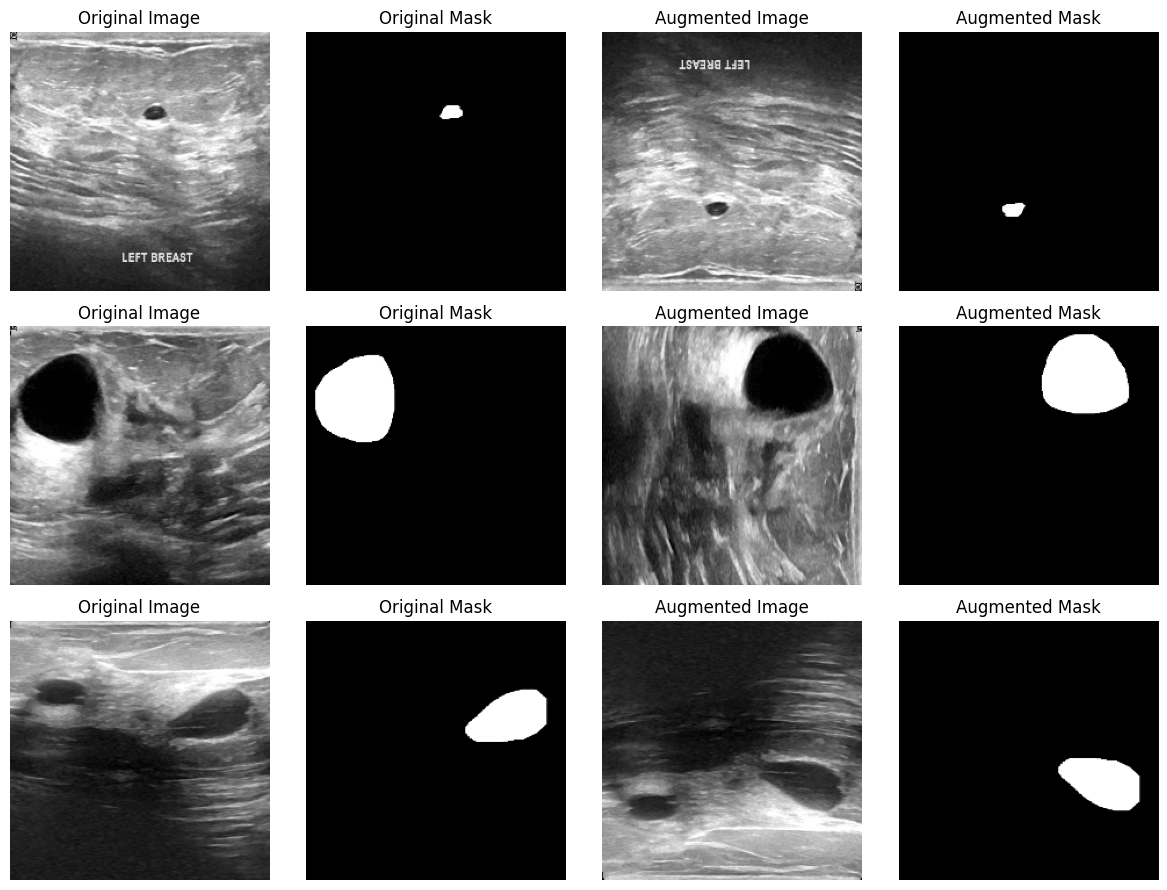

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess image
def load_image(image_path, target_size=(224, 224)):
    image = tf.io.read_file("../dataset/"+image_path) 
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = image / 255.0  # Normalize
    return image

# Function to load and preprocess mask
def load_mask(mask_path, target_size=(224, 224)):
    mask = tf.io.read_file("../dataset/"+mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, target_size)
    mask = mask / 255.0  # Normalize
    return mask

# Data augmentation function (same transformation applied to both image and mask)
def augment_image_mask(image, mask):
    # Random flipping
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)

    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_up_down(image)
        mask = tf.image.flip_up_down(mask)

    # Random rotation (90 degrees)
    k = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)  # Random 0,1,2,3
    image = tf.image.rot90(image, k)
    mask = tf.image.rot90(mask, k)

    return image, mask

# Load a few samples
num_samples = 3
sample_images = [load_image(path) for path in metadata['image_path'][:num_samples]]
sample_masks = [load_mask(path) for path in metadata['mask_path'][:num_samples]]

# Apply augmentation and display results
fig, axes = plt.subplots(num_samples, 4, figsize=(12, num_samples * 3))

for i in range(num_samples):
    orig_img, orig_mask = sample_images[i].numpy(), sample_masks[i].numpy()
    aug_img, aug_mask = augment_image_mask(sample_images[i], sample_masks[i])

    # Convert to NumPy
    aug_img, aug_mask = aug_img.numpy(), aug_mask.numpy().squeeze()

    # Plot original
    axes[i, 0].imshow(orig_img)
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(orig_mask.squeeze(), cmap="gray")
    axes[i, 1].set_title("Original Mask")
    axes[i, 1].axis("off")

    # Plot augmented
    axes[i, 2].imshow(aug_img)
    axes[i, 2].set_title("Augmented Image")
    axes[i, 2].axis("off")

    axes[i, 3].imshow(aug_mask, cmap="gray")
    axes[i, 3].set_title("Augmented Mask")
    axes[i, 3].axis("off")

plt.tight_layout()
plt.show()


In [22]:
import os
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm

# Load dataset CSV
dataset_path = "../dataset/metadata_split.csv"  # Update with actual path
df = pd.read_csv(dataset_path)

# Define output directories
output_dir = "../augmented_dataset"
image_output_dir = os.path.join(output_dir, "images")
mask_output_dir = os.path.join(output_dir, "masks")

# Create directories if they don't exist
os.makedirs(image_output_dir, exist_ok=True)
os.makedirs(mask_output_dir, exist_ok=True)

# How many augmentations per image?
augmentations_per_image = 5  

# List to store new dataset entries
new_data = []

# Iterate through dataset and augment images
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Augmenting Data"):
    # Load image & mask
    image = load_image(row['image_path'])
    mask = load_mask(row['mask_path'])
    label = row['label']  # Get label name
    
    for i in range(augmentations_per_image):
        # Apply augmentation
        aug_image, aug_mask = augment_image_mask(image, mask)

        # Convert to numpy for saving
        aug_image_np = (aug_image.numpy() * 255).astype(np.uint8)
        aug_mask_np = (aug_mask.numpy() * 255).astype(np.uint8)

        # Define new filenames
        new_filename = f"{idx}_aug_{i}_{label}.png"
        new_mask_filename = f"{idx}_aug_{i}_{label}_mask.png"

        # Save augmented images
        cv2.imwrite(os.path.join(image_output_dir, new_filename), cv2.cvtColor(aug_image_np, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(mask_output_dir, new_mask_filename), aug_mask_np)

        # Add new entry to dataset
        new_data.append([os.path.join("images", new_filename), os.path.join("masks", new_mask_filename), row['label'], row['split']])

# Convert list to DataFrame and save new dataset CSV
new_df = pd.DataFrame(new_data, columns=['image_path', 'mask_path', 'label', 'split'])
new_df.to_csv(os.path.join(output_dir, "augmented_metadata.csv"), index=False)

print("Augmented dataset successfully saved!")


Augmenting Data: 100%|████████████████████████| 780/780 [00:15<00:00, 50.73it/s]

Augmented dataset successfully saved!
